<h1>Early Blight Tomato Disease from RGB To HSV </h1>

In [2]:
#importing libraries
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [3]:
#image 1 conversion
eb1=cv2.cvtColor(cv2.imread('EB1.jpg'),cv2.COLOR_BGR2RGB)
eb1Dup=eb1.copy().reshape(256*256,3)

for index,pixel in enumerate(eb1Dup):
    (r,g,b)=[int(x)/255 for x in pixel]
    
    #calculating cmax and cmin
    cmax=max(r,g,b)
    cmin=min(r,g,b)
    diff=cmax-cmin
    
    #calculating hue
    if cmax==cmin:
        h=0
    elif cmax==r:
        h=(60*((g-b)/diff)+360)%360
    elif cmax==g:
        h=(60*((b-r)/diff)+120)%360
    elif cmax==b:
        h=(60*((r-g)/diff)+240)%360
    h/=2
    
    #calculating saturation
    if cmax==0:
        s=0
    else:
        s=(diff/cmax)*255
    #calculating value /brightness
    v=cmax*255
    
    eb1Dup[index]=[np.uint8(h),np.uint8(s),np.uint8(v)]

eb1Dup=eb1Dup.reshape(256,256,3)
#this is corrupted image as hsv doesnt show the image in this form its just a way to represent image

    

<h2>H CHANNEL VISUALIZATION</h2>

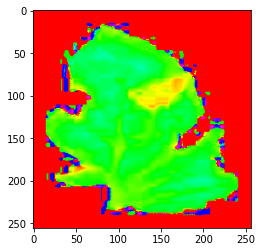

In [21]:
#extracting h values from the image in rgb format
h_channel=eb1Dup[:,:,0]


h_channel=h_channel.reshape(256*256)
h_channel_new=[]
for _,h in enumerate(h_channel):
    h1=[h,255,255]
    h_channel_new.append(h1)
h_channel_new=np.array(h_channel_new,dtype=np.uint8).reshape(256,256,3)

#plotting the h channel
plt.imshow(cv2.cvtColor(h_channel_new,cv2.COLOR_HSV2RGB))

<h2>S Channel Visualization</h2>

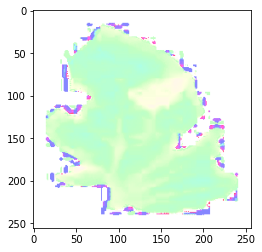

In [18]:
s_channel=eb1Dup[:,:,1]

s_channel=s_channel.reshape(256*256)
s_channel_new=[]
for index,s in enumerate(h_channel):
    s=[h_channel[index],s,255]
    s_channel_new.append(s)
s_channel_new=np.array(s_channel_new,dtype=np.uint8).reshape(256,256,3)

plt.imshow(cv2.cvtColor(s_channel_new,cv2.COLOR_HSV2RGB))
# plt.imshow(s_channel)

<h2>Brightness Channel</h2>

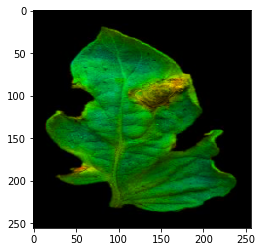

In [41]:
v_channel=eb1Dup[:,:,2]
v_channel=v_channel.reshape(256*256)
v_channel_new=[]
for index,v in enumerate(v_channel):
    v1=[h_channel[index],255,v]
    v_channel_new.append(v1)
v_channel_new=np.array(v_channel_new,dtype=np.uint8).reshape(256,256,3)

plt.imshow(cv2.cvtColor(v_channel_new,cv2.COLOR_HSV2RGB),cmap='gray')

<h2>Comparing our result with inbuild function</h2>

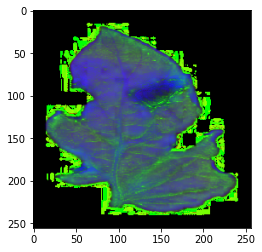

In [14]:

eb2=cv2.imread('EB1.jpg')
eb2c=cv2.cvtColor(cv2.cvtColor(eb2,cv2.COLOR_BGR2RGB),cv2.COLOR_RGB2HSV)
plt.imshow(eb2c)
